In [36]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def slice_image(image_path, voxel_size, flip= False):
    image= Image.open(image_path)
    image= image.convert('L')
    image_width, image_height = image.size
    sliced_list= []
    pos_list= []

    for y in range(0, image_height-voxel_size, voxel_size):
        for x in range(0, image_width-voxel_size, voxel_size):
            box = (x, y, x + voxel_size, y + voxel_size)
            voxel = image.crop(box)

            if flip:
                voxel= voxel.transpose(Image.FLIP_LEFT_RIGHT)

            sliced_list.append(voxel)
            pos_list.append((x, y))

    return sliced_list, pos_list

def check_image(image, pos):
    img= np.array(image)
    x, y= pos
    valid= True
    # print(f"{x}, {y}")

    if x > 500 and y > 600:
        valid= False

    if np.mean(img) < 256/4 -1:
        valid= False

    return valid

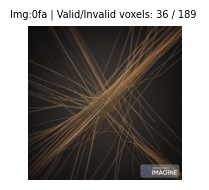

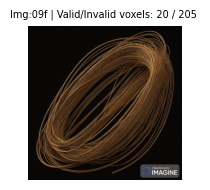

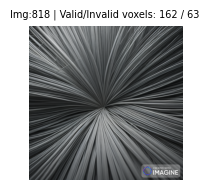

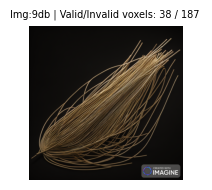

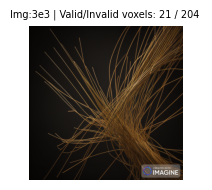

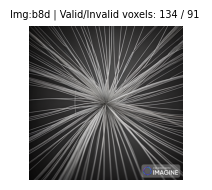

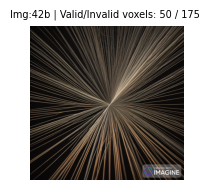

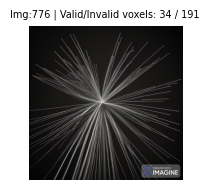

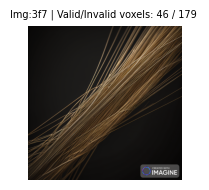

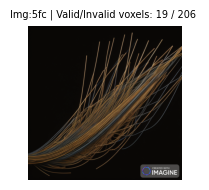

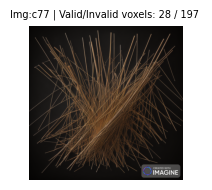

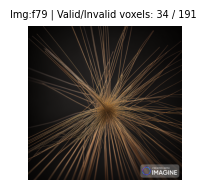

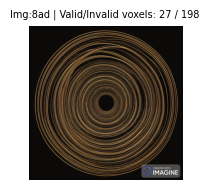

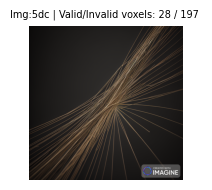

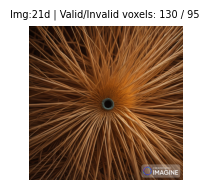

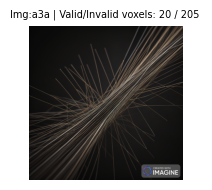

In [40]:
SAVE_FLAG= True
VOXEL_SIZE= 50

output_folder= "./diffusion/diffusion_voxels"  # Replace with the desired output folder

file_list= [file for file in os.listdir("./diffusion") if file.endswith(".png")]
for img_name in file_list:
    img_dir= "./diffusion/" + img_name
    voxel_list, pos_list= slice_image(img_dir, VOXEL_SIZE, True)
    valid_count, invalid_count= 0, 0
    for voxel, pos in zip(voxel_list, pos_list):
        x, y= pos
        if check_image(voxel, pos):
            valid_count += 1
            if SAVE_FLAG:
                file_name= f"{output_folder}/{img_name[:3]}_{x}_{y}.png"
                voxel.save(file_name)
        else:
            invalid_count += 1

    plt.figure(figsize= (2, 2))
    plt.imshow(Image.open(img_dir))
    plt.axis("off")
    plt.title(f"Img:{img_name[:3]} | Valid/Invalid voxels: {valid_count} / {invalid_count} ", fontsize= 7)


In [43]:
curated_dir= "./diffusion/diffusion_voxels/curated"
file_list= [file for file in os.listdir(curated_dir) if file.endswith(".png")]
file_list

['9db_350_350.png',
 '818_50_700.png',
 '776_400_250.png',
 '818_300_650.png',
 '0fa_300_350.png',
 'a3a_400_300.png',
 '0fa_350_400.png',
 '9db_300_400.png',
 'b8d_450_550.png',
 '818_350_100.png',
 '818_700_600.png',
 '3f7_500_200.png',
 '09f_600_200.png',
 '3f7_150_500.png',
 '8ad_250_350.png',
 'f79_250_300.png',
 '21d_500_100.png',
 '21d_600_450.png',
 'f79_200_450.png',
 '21d_650_300.png',
 '8ad_200_400.png',
 '21d_200_400.png',
 '3f7_300_400.png',
 '5fc_500_350.png',
 '818_100_50.png',
 '21d_450_550.png',
 '8ad_450_550.png',
 'f79_450_500.png',
 '21d_400_200.png',
 '3f7_350_350.png',
 '5dc_400_300.png',
 '818_250_200.png',
 '42b_400_300.png',
 '818_600_500.png',
 'b8d_200_400.png',
 '0fa_550_200.png',
 '9db_150_500.png',
 '9db_500_200.png',
 '776_250_300.png',
 'b8d_150_600.png',
 'b8d_250_350.png',
 '42b_300_600.png',
 'b8d_600_450.png',
 '818_200_550.png',
 '42b_450_450.png',
 'b8d_500_100.png',
 '0fa_250_500.png',
 'a3a_500_200.png',
 '818_0_250.png',
 'b8d_550_450.png',
 '81